# Data Science Essential :  Data Gathering

---

## Table of Contents

### 1. Web Scraping

### 2. Write the data to SQLite

---

## 1. Web Scraping with Beautiful Soup

### What is Beautiful Soup?

The major concept with Beautiful Soup is that it allows you to access elements of your page by following the CSS structures. Once we grab elements, Python makes it easy to write the elements or relevant components of the elements into other files, such as a CSV, that can be stored in a database or opened in other software.
<br><br>
__First__, we have to turn the website code into a Python object. <br>
print response.text. Then turns the text into an Python object named soup. <br>
__Second__, the built in Python parser, which we can call using html.parser that Beautiful Soup uses to parse your text. 

Step by step
- Step 1. First of all, you will have to install Beautifulsoup and Requests
- Step 2. Find the URL you want to scrape
- Step 3. Define what information you want to scrape
- Step 4. Identify the structure of the sites HTML
- Step 5. Write the scraping code for retrieving the “soup”
- Step 6. Extract the information from the “soup”

#### Step 1. First of all, you will have to install Beautifulsoup and Requests

Beautiful Soup 4 is published through PyPi, so you can install it with pip. <br>
> _pip install beautifulsoup4_

In [1]:
import requests
import bs4
import re

#### Step2 and 3.

- Find the URL
- Define what information you want

In [2]:
response = requests.get('http://www.thairsc.com/th/BigAccidentAll.aspx?l=th')

In [3]:
print(response.text)



<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head><meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" /><meta name="viewport" content="width=device-width, initial-scale=1" /><meta name="Keywords" content="thai rsc, thairsc, thai-rsc, strive for by,road safety culture, road safety citizens,  road safety collaboration, ศูนย์ข้อมูล, ศูนย์ข้อมูลอุบัติเหตุ, ศูนย์ข้อมูลอุบัติเหตุ Thai Rsc, ศูนย์ข้อมูลอุบัติเหตุ ThaiRsc, ศูนย์ข้อมูลอุบัติเหตุ Thai-Rsc , อุบัติเหตุ, ข้อมูลอุบัติเหตุ , ทศวรรษ, White Paper, เครือข่ายเฝ้าระวัง อบถ., สถิติ, Remembrance, ปฏิทินกิจกรรม, พ.ร.บ., ข้อมูลรับแจ้งอุบัติเหตุทางถนน, ข้อมูลรับแจ้ง, อุบัติเหตุทางถนน, ทางถนน, บาดเจ็บ, เสียชีวิต, ข้อมูลสะสมปี, ศูนย์รับแจ้งเหตุ, สถานที่เกิดอุบัติเหตุ, ทศวรรษแห่งความปลอดภัยทางถนน 2554-2563, ทศวรรษแห่งความปลอดภัยทางถนน, 2554-2563, ความปลอดภัยทางถนน" /><meta name="Description" content="ศูนย์ข้อมูลอุบ

In [4]:
soup = bs4.BeautifulSoup(response.text, 'html.parser')

In [5]:
soup.title.string

'\r\n\tศูนย์ข้อมูลอุบัติเหตุ\r\n'

In [6]:
data = soup.findAll(attrs={'class':'text-detail'})

In [7]:
data[1].string

'\r\n                                อุบัติเหตุ  “รถบรรทุก ชนกับรถจักยานยนต์ เสียชีวิต 2 ราย ” ที่ อ.เมือง จ.พัทลุง (เหตุเกิดวันที่  05/09/2563  เวลาประมาณ 19.30 น.)'

#### Step 6. Extract Pattern from RegEx

In [28]:
acc_text    = []
acc_day     = []
acc_month   = []
acc_year    = []
acc_addr1   = []
acc_addr2   = []
acc_time    = []

In [29]:
# 1.1 Pattern ข้อความแจ้งอุบัติเหตุ
re_text = re.compile(r"อุบัติเหตุ\s*[\"“]*([\s\w\-\.ก-๙]+)[\"”]*")

#1.2 Pattern วันที่เกิดอุบัติเหตุ
re_date = re.compile(r"วันที่\s*(\d+)[/-](\d+)[/-](\d+)")

#1.3 Pattern เวลาเกิดเหตุ
re_time = re.compile(r"(เวลา|เวลาประมาณ)\s*(\d+\.\d+)\s*")

#1.4 Pattern สถานที่เกิดเหตุ (อำเภอ และ จังหวัด)
re_addr = re.compile(r"(อ\.|อำเภอ|เขต)\s*([ก-๙]+)\s*(จ\.|จังหวัด)*\s*([ก-๙]+)")

In [30]:
for i in range(1, len(data)):
    ## Data
    mdate = re_date.search(data[i].string)
    mtime = re_time.search(data[i].string)
    maddr = re_addr.search(data[i].string)
    mtext = re_text.search(data[i].string)

    if mtext and mtext.group(1):

        acc_day.append(mdate.group(1))
        acc_month.append(mdate.group(2))
        acc_year.append(mdate.group(3))

        ## Time
        acc_time.append(mtime.group(2))

        ## Accident Address
        acc_addr1.append(maddr.group(2))
        acc_addr2.append(maddr.group(4))

        ## Accident message
        acc_text.append(mtext.group(1))


In [31]:
len(acc_day)

28

In [32]:
import pandas as pd

acc_data = {
        'acc_text':     acc_text , 
        'acc_day':     acc_day , 
        'acc_month': acc_month , 
        'acc_year':    acc_year, 
        'acc_time':    acc_time, 
        'acc_zone':   acc_addr1, 
        'acc_city':   acc_addr2
}

df = pd.DataFrame(acc_data)

In [33]:
df.head()

,acc_text,acc_day,acc_month,acc_year,acc_time,acc_zone,acc_city
0,รถบรรทุก ชนกับรถจักยานยนต์ เสียชีวิต 2 ราย,05,09,2563,19.30,เมือง,พัทลุง
1,รถยนต์กระบะชนกับเสาไฟฟ้า เสียชีวิต 2 ราย,05,09,63,14.00,ค่ายบางระจัน,สิงห์บุรี
2,รถยนต์กระบะเสียหลักพลิกคว่ำ เสียชีวิต 2 ราย,05,09,2563,00.51,กุมภวาปี,อุดรธานี
3,รถยนต์กระบะเสียหลักพลิกคว่ำ เสียชีวิต 2 ราย ...,04,09,63,17.40,สรรคบุรี,ชัยนาท
4,รถกระบะ ชนกับ รถจักรยานยนต์พ่วงข้าง เสียชีวิต...,02,08,2563,23.26,พิชัย,อุตดิตย์


---

## 2. Write DataFrame to SQLite

In [34]:
import sqlite3

In [35]:
conn = sqlite3.connect('accident.db')

In [36]:
df.to_sql('accident_table', conn, if_exists='replace')

In [37]:
q = pd.read_sql_query('select * from accident_table;', conn)
q.head()

,index,acc_text,acc_day,acc_month,acc_year,acc_time,acc_zone,acc_city
0,0,รถบรรทุก ชนกับรถจักยานยนต์ เสียชีวิต 2 ราย,05,09,2563,19.30,เมือง,พัทลุง
1,1,รถยนต์กระบะชนกับเสาไฟฟ้า เสียชีวิต 2 ราย,05,09,63,14.00,ค่ายบางระจัน,สิงห์บุรี
2,2,รถยนต์กระบะเสียหลักพลิกคว่ำ เสียชีวิต 2 ราย,05,09,2563,00.51,กุมภวาปี,อุดรธานี
3,3,รถยนต์กระบะเสียหลักพลิกคว่ำ เสียชีวิต 2 ราย ...,04,09,63,17.40,สรรคบุรี,ชัยนาท
4,4,รถกระบะ ชนกับ รถจักรยานยนต์พ่วงข้าง เสียชีวิต...,02,08,2563,23.26,พิชัย,อุตดิตย์


In [38]:
q['acc_city'].value_counts(ascending=False)

ลำปาง              3
อุดรธานี           3
ร้อยเอ็ด           2
พระนครศรีอยุธยา    1
สมุทรปราการ        1
เพชรบุรี           1
พิษณุโลก           1
แพร่               1
นครสวรรค์          1
ปัตตานี            1
เพชรบูรณ์          1
สมุทรสาคร          1
กรุงเทพมหานคร      1
อุตดิตย์           1
เลย                1
ชัยนาท             1
กระบี่             1
อุบลราชธานี        1
ตราด               1
สกลนคร             1
พัทลุง             1
สิงห์บุรี          1
นครศรีธรรมราช      1
Name: acc_city, dtype: int64

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'ลำปาง'),
  Text(1, 0, 'อุดรธานี'),
  Text(2, 0, 'ร้อยเอ็ด'),
  Text(3, 0, 'พระนครศรีอยุธยา'),
  Text(4, 0, 'สมุทรปราการ'),
  Text(5, 0, 'เพชรบุรี'),
  Text(6, 0, 'พิษณุโลก'),
  Text(7, 0, 'แพร่'),
  Text(8, 0, 'นครสวรรค์'),
  Text(9, 0, 'ปัตตานี'),
  Text(10, 0, 'เพชรบูรณ์'),
  Text(11, 0, 'สมุทรสาคร'),
  Text(12, 0, 'กรุงเทพมหานคร'),
  Text(13, 0, 'อุตดิตย์'),
  Text(14, 0, 'เลย'),
  Text(15, 0, 'ชัยนาท'),
  Text(16, 0, 'กระบี่'),
  Text(17, 0, 'อุบลราชธานี'),
  Text(18, 0, 'ตราด'),
  Text(19, 0, 'สกลนคร'),
  Text(20, 0, 'พัทลุง'),
  Text(21, 0, 'สิงห์บุรี'),
  Text(22, 0, 'นครศรีธรรมราช')])

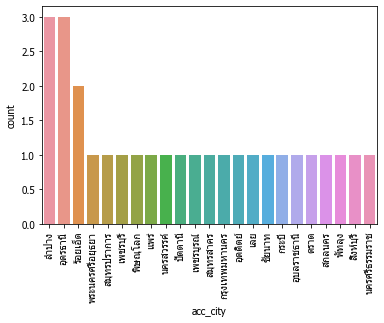

In [40]:
plt.rcParams['font.family'] = 'Tahoma'
#pd.value_counts(q['acc_city']).plot.bar()
sns.countplot(x='acc_city', data=q, order = q['acc_city'].value_counts().index)
plt.xticks(rotation=90)

---